In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="ZpbOX5xD9yr3IIQFTK5A")

# one project
project = rf.workspace("aastmt-y5wwb").project("debi_final")
version = project.version(7)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...


In [18]:
from glob import glob
dataset_name = "DEBI_FINAL-7"

for split in ["train", "test", "valid"]:
    dir = f"./{dataset_name}/{split}/labels/*"
    for label_file in glob(dir):
        with open(label_file, 'r') as f:
            lines = f.readlines()
            for i in range(len(lines)):
                lines[i] = '0' + lines[i][1:]
                
        with open(label_file, 'w') as f:
            f.writelines(lines)

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

model = YOLO("yolo11n.pt")

model.train(
    task="detect",
    data=f"{dataset.location}/data.yaml",  # path to dataset YAML
    epochs=100,  # number of training epochs
    imgsz=640,  # training image size
    device="mps",  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.49 🚀 Python-3.11.4 torch-2.5.1 MPS (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/Users/jonnypei/Documents/Berkeley/Coursework/EECS 106A/Project/EECS106A-ballz/cv/DEBI_FINAL-7/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fals

train: Scanning /Users/jonnypei/Documents/Berkeley/Coursework/EECS 106A/Project/EECS106A-ballz/cv/DEBI_FINAL-7/train/labels.cache... 1782 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1782/1782 [00:00<?, ?it/s]
val: Scanning /Users/jonnypei/Documents/Berkeley/Coursework/EECS 106A/Project/EECS106A-ballz/cv/DEBI_FINAL-7/valid/labels.cache... 264 images, 0 backgrounds, 0 corrupt: 100%|██████████| 264/264 [00:00<?, ?it/s]


Plotting labels to runs/detect/train13/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train13
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.15G      1.033       1.75      1.008         13        640: 100%|██████████| 112/112 [1:53:33<00:00, 60.83s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:32<04:22, 32.76s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:59<03:25, 29.29s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 3/9 [01:41<03:29, 34.95s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 4/9 [02:10<02:43, 32.70s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 5/9 [02:41<02:08, 32.19s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 6/9 [03:08<01:31, 30.46s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [04:44<00:00, 31.64s/it]


                   all        264        503      0.943      0.426      0.656       0.46

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.62G      1.025      1.119      1.004         23        640: 100%|██████████| 112/112 [1:12:42<00:00, 38.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:20<02:47, 21.00s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:34<01:58, 16.87s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 3/9 [00:43<01:17, 12.88s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 4/9 [00:52<00:56, 11.32s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 5/9 [01:08<00:53, 13.33s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 6/9 [01:29<00:47, 15.76s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  78%|███████▊  | 7/9 [01:43<00:30, 15.07s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 8/9 [01:51<00:12, 12.99s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [01:57<00:00, 13.10s/it]


                   all        264        503      0.757      0.204      0.225      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.92G      1.021     0.9295      1.003         16        640: 100%|██████████| 112/112 [39:27<00:00, 21.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/9 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11%|█         | 1/9 [00:25<03:24, 25.57s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22%|██▏       | 2/9 [00:43<02:26, 21.00s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  33%|███▎      | 3/9 [00:56<01:43, 17.31s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  44%|████▍     | 4/9 [01:08<01:16, 15.26s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  56%|█████▌    | 5/9 [01:19<00:54, 13.60s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  67%|██████▋   | 6/9 [01:35<00:43, 14.50s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  78%|███████▊  | 7/9 [01:52<00:30, 15.49s/it]

WARNING ⚠️ NMS time limit 3.600s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  89%|████████▉ | 8/9 [02:04<00:14, 14.39s/it]

WARNING ⚠️ NMS time limit 2.400s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [02:11<00:00, 14.58s/it]


                   all        264        503      0.852      0.187      0.177      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.1G     0.9906     0.8319       1.01         46        640:  23%|██▎       | 26/112 [09:42<36:02, 25.15s/it] 

In [ ]:
file_name = "balls.JPG"
results = model.predict("./test_images/" + file_name, device="mps", conf=0.5, save=True)


image 1/1 /Users/jonnypei/Documents/Berkeley/Coursework/EECS 106A/Project/EECS106A-ballz/cv/test_images/balls.JPG: 448x640 1 person, 2 apples, 364.3ms
Speed: 41.7ms preprocess, 364.3ms inference, 40.0ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict


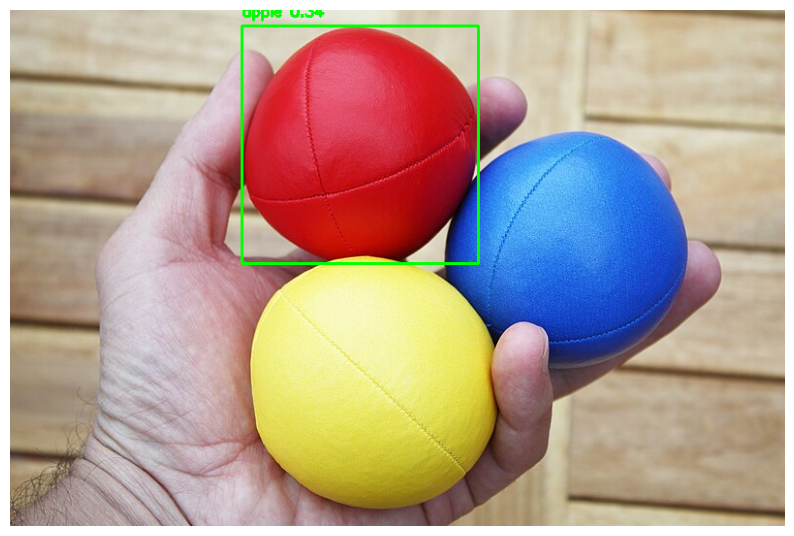

In [21]:
if results:
    for result in results:
        boxes = result.boxes.cpu().numpy()
        for box in boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0]
            class_id = int(box.cls[0])
            label = f"{result.names[class_id]} {confidence:.2f}"

            # Read the image using cv2
            img = cv2.imread(f"./test_images/" + file_name)
            # Draw bounding box and label
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()